* # *It is recommended to go through 'Playing with NLP - 1' before reading this notebook!*

# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

### Assignments 1: 
#### Find `Most Common Words` and create word cloud.

#### Read in the document-term matrix

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Import the output of 'Playing with NLP - 1' to input of this notebook

In [3]:
import pickle
data_dtm=pickle.load(open('/kaggle/input/playing-with-nlp-1/dtm.pkl','rb'))
data_dtm.head()

,aaaaah,aaah,aah,abandoned,abc,abcs,ability,able,ablebodied,abnormal,...,zillion,zip,ziploced,zombie,zombies,zone,zoning,zoo,zoom,zorro
ali,0,0,0,0,1,0,0,2,0,0,...,0,0,0,1,0,0,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,1,0,1,0,0,...,1,0,0,1,1,0,1,0,0,0
bo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dave,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Find  and print the top 30 words said by each comedian


In [4]:
# temp_string= ' '
# temp_string.join(temp.iloc[:,0].sort_values(ascending=False)[:30].index)
data_dtm.T

,ali,anthony,bill,bo,dave,david,hasan,jim,joe,john,kevin,leanne,lewis,louis,matt,mike,pete,ricky,shane,stavros
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aah,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0
abandoned,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
abc,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zone,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
zoning,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
zoo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
zoom,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [5]:
# data_dtm.T.iloc[:,1].sort_values(ascending=False)[:30].index
for i,c in enumerate(data_dtm.T.columns):
    print(data_dtm.T.iloc[:,i].sort_values(ascending=False)[:30])


like        126
im           74
know         68
just         64
dont         61
shit         34
thats        34
youre        31
gonna        28
ok           26
lot          24
gotta        21
oh           21
wanna        21
husband      20
got          19
right        19
time         19
cause        18
day          17
women        17
people       16
pregnant     15
god          14
need         14
hes          14
tell         13
yeah         13
really       12
dude         12
Name: ali, dtype: int64
im         60
like       50
know       39
dont       38
joke       37
got        34
said       31
thats      31
just       30
anthony    27
say        26
day        26
guys       23
people     23
youre      19
tell       19
right      18
grandma    18
jokes      17
think      17
time       17
thing      17
yeah       16
okay       16
good       16
did        16
school     16
gonna      15
baby       15
ive        15
Name: anthony, dtype: int64
like       201
just       150
right      131
im 

In [6]:
temp=data_dtm.T
# temp_dict= {}
temp_strings= []
for i,c in enumerate(temp.columns):
    temp_strings.append(temp.iloc[:,i].sort_values(ascending=False)[:30].index) #gives list of lists
    # temp_dict[c]=temp.iloc[:,i].sort_values(ascending=False)[:30]
     # temp_dict={key=c,value=}

# temp_df= pd.DataFrame(temp_dict)
# temp_df.T
for i in range(0,len(temp_strings)):
    temp_strings[i]= ' '.join(temp_strings[i])

temp_strings

['like im know just dont shit thats youre gonna ok lot gotta oh wanna husband got right time cause day women people pregnant god need hes tell yeah really dude',
 'im like know dont joke got said thats just anthony say day guys people youre tell right grandma jokes think time thing yeah okay good did school gonna baby ive',
 'like just right im know dont gonna got fucking yeah shit youre thats dude fuck think want people did hes guy didnt make come thing going theyre let theres little',
 'scraps week directly inbox accept privacy email enter reserved policy articles rights best loft possible aaaaah possibly post possession posted poster posters posture possibility positions possesses posse positive position pose',
 'like know said just im shit people didnt ahah dont time thats fuck fucking black man got good right gonna gay lot did yeah hes oh oj kevin come guys',
 'audience like laughing just know irish yeah im thats people youre applauding oh bit said cause dont got didnt america did

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
cv= CountVectorizer()
data_cv= cv.fit_transform(temp_strings)

In [9]:
cv_df = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
#cv_df.index = data.index
cv_df

,aaaaah,accept,ahah,america,anthony,applauding,articles,audience,baby,best,...,want,way,week,went,white,wife,women,yall,yeah,youre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
3,1,1,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1
6,1,1,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1


#### By looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that. Look at the most common top words and add them to the stop word list.



In [10]:
stopwords_list= []
sum=[]
for i,c in enumerate(cv_df.columns):
    if(np.sum(cv_df.iloc[:,i]) > 1):
        sum.append(np.sum(cv_df.iloc[:,i]))
        stopwords_list.append(c)

stopwords_list

['aaaaah',
 'accept',
 'articles',
 'baby',
 'best',
 'cause',
 'come',
 'dad',
 'day',
 'did',
 'didnt',
 'directly',
 'dont',
 'dude',
 'email',
 'enter',
 'fck',
 'fcking',
 'fuck',
 'fucking',
 'gay',
 'god',
 'goes',
 'going',
 'gonna',
 'good',
 'got',
 'gotta',
 'guy',
 'guys',
 'hes',
 'hey',
 'husband',
 'im',
 'inbox',
 'ive',
 'just',
 'kids',
 'know',
 'let',
 'life',
 'like',
 'little',
 'loft',
 'lot',
 'love',
 'make',
 'man',
 'mean',
 'mom',
 'oh',
 'ok',
 'okay',
 'old',
 'people',
 'policy',
 'por',
 'porch',
 'pork',
 'porn',
 'pornhub',
 'pornos',
 'porny',
 'porridge',
 'port',
 'portion',
 'ports',
 'portuguese',
 'pose',
 'position',
 'positions',
 'positive',
 'posse',
 'possesses',
 'possession',
 'possibility',
 'possible',
 'possibly',
 'post',
 'posted',
 'poster',
 'posters',
 'posture',
 'posturing',
 'potato',
 'privacy',
 'real',
 'really',
 'reserved',
 'right',
 'rights',
 'said',
 'say',
 'scraps',
 'shes',
 'shit',
 'tell',
 'thats',
 'theres',
 'th

In [11]:
!pip install nltk

In [12]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
stpwords= nltk.corpus.stopwords.words('english')
stpwords.extend(stopwords_list)
stpwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

#### Let's aggregate this list and identify the most common words along with how many routines they occur in


In [15]:
id=pd.DataFrame(sum,stopwords_list,columns=['Count'])
id

,Count
aaaaah,4
accept,2
articles,2
baby,2
best,2
...,...
went,3
white,2
women,2
yeah,9


#### If more than half of the comedians have it as a top word, exclude it from the list


In [16]:
exclude=id[id['Count']<6]
exclude.index

Index(['aaaaah', 'accept', 'articles', 'baby', 'best', 'come', 'dad', 'didnt',
       'directly', 'dude', 'email', 'enter', 'fck', 'fcking', 'gay', 'god',
       'goes', 'gotta', 'guy', 'guys', 'hey', 'husband', 'inbox', 'ive',
       'kids', 'let', 'life', 'loft', 'lot', 'love', 'make', 'man', 'mean',
       'mom', 'ok', 'okay', 'old', 'policy', 'por', 'porch', 'pork', 'porn',
       'pornhub', 'pornos', 'porny', 'porridge', 'port', 'portion', 'ports',
       'portuguese', 'pose', 'position', 'positions', 'positive', 'posse',
       'possesses', 'possession', 'possibility', 'possible', 'possibly',
       'post', 'posted', 'poster', 'posters', 'posture', 'posturing', 'potato',
       'privacy', 'real', 'reserved', 'rights', 'scraps', 'shes', 'tell',
       'theres', 'thing', 'thought', 'wanna', 'week', 'went', 'white',
       'women'],
      dtype='object')

In [17]:
stpwords=[ele for ele in stpwords if i not in exclude.index]

In [18]:
stpwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean=pickle.load(open('/kaggle/input/playing-with-nlp-1/data_clean.pkl','rb')) # data_dtm=pickle.load(open('dtm.pkl','rb'))
# data_clean.head()
    


# Add new stop words
cv=CountVectorizer(stop_words=stpwords)
data_cv=cv.fit_transform(data_clean['transcript'])

# Recreate document-term matrix
new_data_dtm=pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out(), index=data_clean.index)

# Pickle it for later use
data_clean.to_pickle('data_clean.pkl') #cleaned transcripts of each comdedian
new_data_dtm.head()




,aaah,aah,abandoned,abc,abcs,ability,able,ablebodied,abnormal,abolitionist,...,zillion,zip,ziploced,zombie,zombies,zone,zoning,zoo,zoom,zorro
ali,0,0,0,1,0,0,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,0,0,0,0,1,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,0
bo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dave,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
!pip install wordcloud

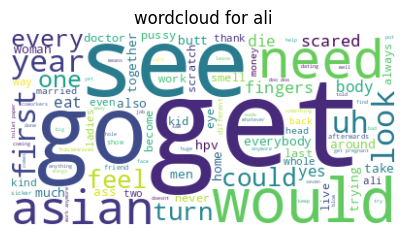

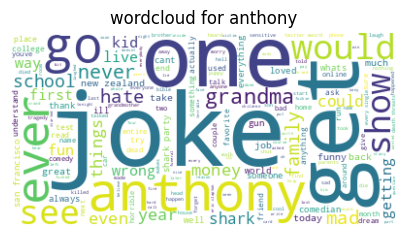

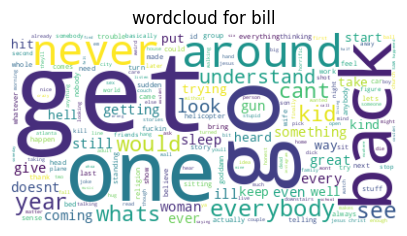

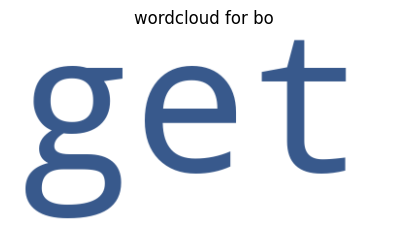

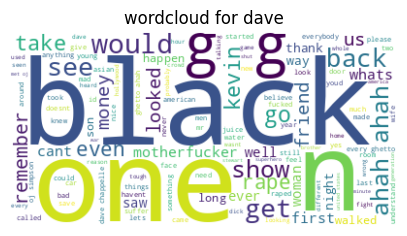

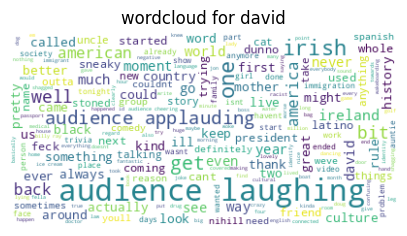

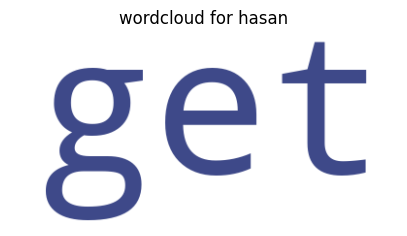

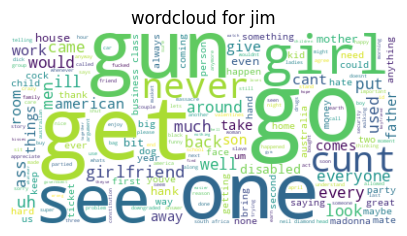

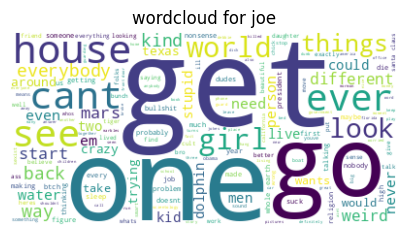

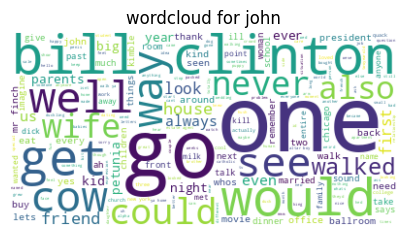

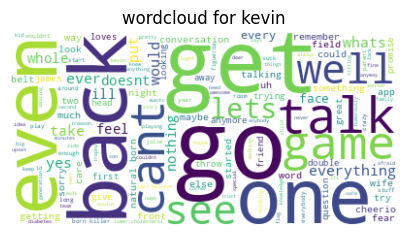

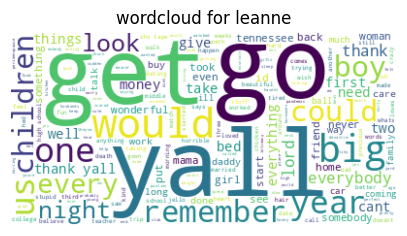

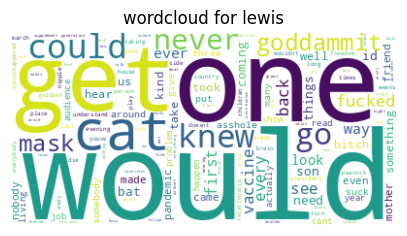

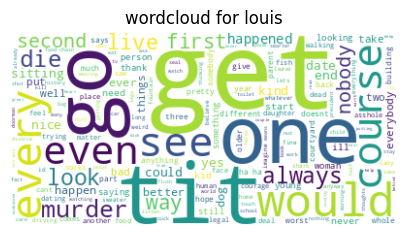

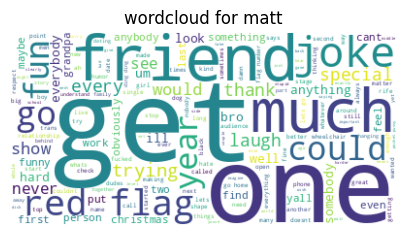

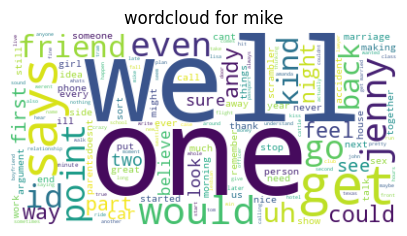

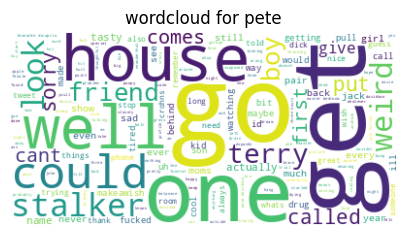

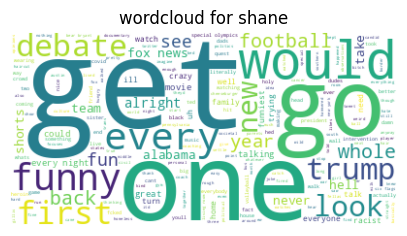

In [21]:
# Let's make some word clouds!
import matplotlib.pyplot as plt
from wordcloud import WordCloud
for i,c in enumerate(data_clean.index):
    if len(data_clean.loc[c]['transcript'])==0:
        continue
    wc=WordCloud(stopwords=stpwords,background_color='white').generate(data_clean.loc[c]['transcript'])
    plt.figure(figsize=(5,5))
    plt.imshow(wc,interpolation='bilinear')
    plt.title(f'wordcloud for {c}')
    plt.axis('off')
    plt.show()
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud


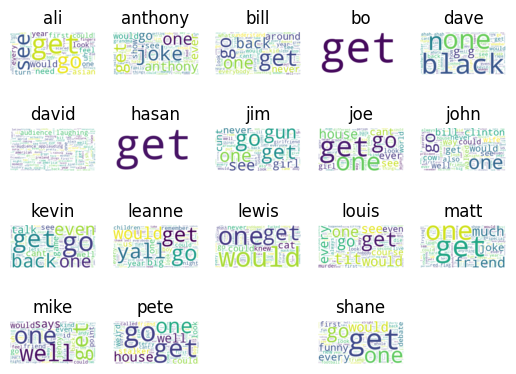

In [22]:
# Reset the output dimensions
import matplotlib.pyplot as plt
# fig,ax=plt.subplots(nrows=3,ncols=4)
for i,c in enumerate(data_clean.index):
    if len(data_clean.loc[c]['transcript'])==0:
        continue
    wc=WordCloud(stopwords=stpwords,background_color='white').generate(data_clean.loc[c]['transcript'])
    # fig.imshow(wc,interpolation='bilinear')
    # plt.figure(figsize=(5,5))
    # plt.imshow(wc,interpolation='bilinear')
    # plt.title(f'wordcloud for {c}')
    # plt.axis('off')
    plt.subplot(4,5, i+1);
    plt.imshow(wc, interpolation="bilinear");
    plt.axis("off");
    plt.title(c);
    

# Create subplots for each comedian


#### You observations
1. 
2.
3.

### Assignment 2:
#### Find the number of unique words that each comedian uses.

In [23]:
# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
# for ele in new_data_dtm.columns:
# new_data_dtm.columns[ele for ele in new_data_dtm.columns if np.sum(new_data_dtm[])>0]
# stpwords= [ele for ele in stpwords if i not in exclude.index]

word=[]
count=[]
for i,c in enumerate(new_data_dtm.columns):
    if np.sum(new_data_dtm.iloc[:,i])>0:
        word.append(c)
        count.append(np.sum(new_data_dtm.iloc[:,i]))
temp_dtm=pd.DataFrame(count,word)
temp_dtm
# Create a new dataframe that contains this unique word count


,0
aaah,1
aah,4
abandoned,1
abc,1
abcs,1
...,...
zone,2
zoning,1
zoo,1
zoom,1


In [24]:
# Calculate the words per minute of each comedian
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79, 69, 54, 86, 75, 54, 76, 95, 43]
total_words=[]
# for i in new_data_dtm.index:
new_data_dtm.head()
for i in new_data_dtm.index:
    total_words.append(np.sum(new_data_dtm.loc[i],axis=0))
    

# Find the total number of words that a comedian uses
total_words

# add some columns to our dataframe: 'total_words', 'run_times' and 'words_per_minute'
data_clean['total_words']=total_words
data_clean['run_times']=run_times
data_clean['words_per_minute']=data_clean['total_words']/data_clean['run_times']
data_clean.head()
# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_clean['words_per_minute'].sort_values()


stavros     0.000000
ricky       0.000000
hasan       0.012987
bo          0.016667
shane      24.600000
lewis      40.101449
matt       40.720930
leanne     42.215190
kevin      42.947368
anthony    43.694915
ali        43.850000
louis      49.703704
dave       50.940299
bill       51.937500
pete       52.259259
mike       53.373333
joe        56.548387
john       60.051724
jim        60.365079
david      75.287671
Name: words_per_minute, dtype: float64

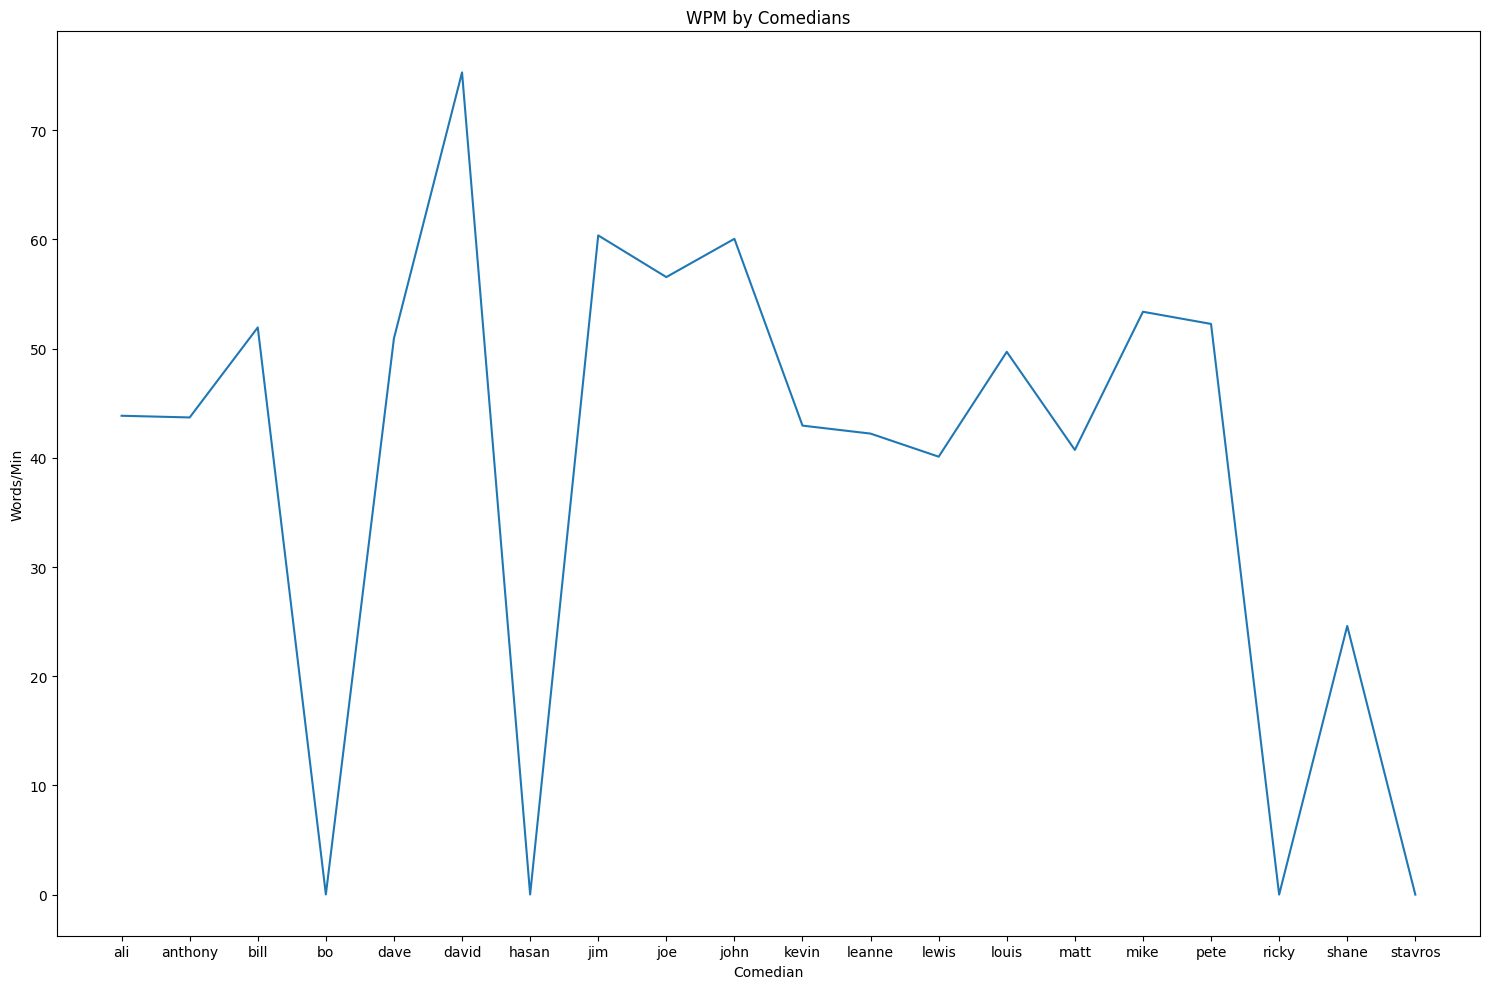

In [25]:
# plot our findings
#import numpy as np
fig,ax=plt.subplots(figsize=(15,10))
ax.plot(data_clean['words_per_minute']);
# ax.xlabel='Comedian'
# plt.ylabel='Words/Minute'
ax.set(title='WPM by Comedians',xlabel='Comedian',ylabel='Words/Min');
plt.tight_layout()



#### Write your findings. For example:
* **Vocabulary**
   * Ricky Gervais (British comedy) and Bill Burr (podcast host) use a lot of words in their comedy
   * Louis C.K. (self-depricating comedy) and Anthony Jeselnik (dark humor) have a smaller vocabulary


* **Talking Speed**
   * Joe Rogan (blue comedy) and Bill Burr (podcast host) talk fast
   * Bo Burnham (musical comedy) and Anthony Jeselnik (dark humor) talk slow
   
Ali Wong is somewhere in the middle in both cases. Nothing too interesting here.

### Assignment 3: 
#### Check the profanity by analysing the common bad words, like `fucking`, `fuck`, `shit etc.

In [26]:
# take a look at the most common words.
profanity=['fucking','fuck','shit']
# data_clean[data_clean['transcript']]
data_clean['transcript']

ali        ladies and gentlemen please welcome to the sta...
anthony    thank you thank you thank you san francisco th...
bill        all right thank you thank you very much thank...
bo         enter your email i accept the privacy policy s...
dave       this is dave he tells dirty jokes for a living...
david      in this comedy special david nihill humorously...
hasan      enter your email i accept the privacy policy s...
jim         ladies and gentlemen please welcome to the st...
joe         ladies and gentlemen welcome joe rogan what t...
john       armed with boyish charm and a sharp wit the fo...
kevin      kevin james irregardless in kevin james irrega...
leanne     leanne morgan im every woman in im every woman...
lewis      lewis black tragically i need you is a standup...
louis      introfade the music out lets roll hold there l...
matt       in his second hourlong comedy special matthew ...
mike       wow hey thank you thanks thank you guys hey se...
pete       pete davidson

In [27]:
fuck_list= []
fucking_list= []
shit_list= []
for i in range(0,len(data_clean)):
    f_word,fking_word,s_word= 0,0,0
    data_bad =data_clean['transcript'][i].split()
    for j in range(0,len(data_bad)):
        if data_bad[j]=='fuck':
            f_word+=1
        elif data_bad[j]=='fucking':
            fking_word+=1
        elif data_bad[j]=='shit':
            s_word+=1
    fuck_list.append(f_word)
    fucking_list.append(fking_word)
    shit_list.append(s_word)

/tmp/ipykernel_18/4136045424.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data_bad =data_clean['transcript'][i].split()


In [28]:
# fuck_list.T

In [29]:
# isolate just these bad words
fuck_list= pd.Series(fuck_list).T
fucking_list= pd.Series(fucking_list).T
shit_list= pd.Series(shit_list).T
bad_df= pd.concat([fuck_list,fucking_list,shit_list],axis=1)
bad_df.index= data_clean.index
bad_df.columns= ['f_word','fing_word','s_word']
bad_df

,f_word,fing_word,s_word
ali,11,5,34
anthony,9,6,9
bill,36,71,64
bo,0,0,0
dave,33,32,46
david,0,0,0
hasan,0,0,0
jim,37,78,20
joe,0,0,40
john,2,2,6


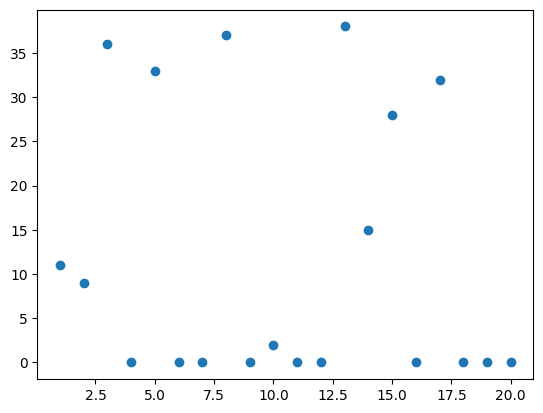

In [30]:
# create a scatter plot of your findings
fig,ax=plt.subplots()
# scatter=ax.scatter(bad_df['f_word'],bad_df['s_word'],c=[i for i,c in enumerate(bad_df.index)]);
# ax.legend(*scatter.legend_elements(),title=[[c for i,c in enumerate(bad_df.index)]],bbox_to_anchor=(1, 1), loc='upper left');
ax.scatter(np.arange(1,21),bad_df['f_word']);



### Write your findings. 
#### For example:
* **Averaging 2 F-Bombs Per Minute!** - I don't like too much swearing, especially the f-word, which is probably why I've never heard of Bill Bur, Joe Rogan and Jim Jefferies.
* **Clean Humor** - It looks like profanity might be a good predictor of the type of comedy I like. Besides Ali Wong, my two other favorite comedians in this group are John Mulaney and Mike Birbiglia.

### Assignment 4:(optional)
What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.